In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from mpl_toolkits import mplot3d

In [3]:
#create Dataframe to read the raw data file
df = pd.read_csv('/content/Crop Production data.csv')

In [4]:
#Name of all columns in the Dataframe
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [5]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
#checking the data types of all columns in the dataframe
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38266 entries, 0 to 38265
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     38266 non-null  object 
 1   District_Name  38266 non-null  object 
 2   Crop_Year      38266 non-null  int64  
 3   Season         38265 non-null  object 
 4   Crop           38265 non-null  object 
 5   Area           38265 non-null  float64
 6   Production     38181 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.0+ MB


In [8]:
#Creating a new column named "Date" having the datatype of date
df["Date"] = pd.to_datetime(df["Crop_Year"], format='%Y')

In [9]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Date
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2000-01-01
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01


In [10]:
#All unique state names
Unique_State_Name = df["State_Name"].unique()
print(Unique_State_Name)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar']


In [11]:
unique_date = df["Date"].unique()
print(unique_date)

<DatetimeArray>
['2000-01-01 00:00:00', '2001-01-01 00:00:00', '2002-01-01 00:00:00',
 '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2005-01-01 00:00:00',
 '2006-01-01 00:00:00', '2010-01-01 00:00:00', '1997-01-01 00:00:00',
 '1998-01-01 00:00:00', '1999-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2011-01-01 00:00:00',
 '2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00']
Length: 18, dtype: datetime64[ns]


In [12]:
df["Season"] = df["Season"].str.strip()
Unique_Season = df["Season"].unique()
print(Unique_Season)

['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter' nan]


In [13]:
#Categorizing the 6 seasons into 4 major Indian Cropping seasons
df["Season"] = df["Season"].apply(lambda x : "Rabi" if x == "Winter" else x)
df["Season"] = df["Season"].apply(lambda x : "Rabi" if x == "Autumn" else x)
df["Season"] = df["Season"].apply(lambda x : "Zaid" if x == "Summer" else x)
print(df["Season"].unique())

['Kharif' 'Whole Year' 'Rabi' 'Zaid' nan]


In [14]:
#all unique crop names
df["Crop"] = df["Crop"].str.strip()
Unique_Crop = df["Crop"].unique()
print(Unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' nan]


In [15]:
df["Crop"] = df["Crop"].apply(lambda x : "Seasum" if x == "Sesamum" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Pomegranate" if x == "Pome Granet" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Sunhemp" if x == "Sannhamp" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Raddish" if x == "Redish" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Soybean" if x == "Soyabean" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Snake Gourd" if x == "Snak Guard" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Pumpkin" if x == "Pump Kin" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Paddy" if x == "Rice" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Blackgram" if x == "Urad" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Lentin" if x == "Masoor" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Jute & mesta" if x == "Jute" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Jute & mesta" if x == "Mesta" else x)
df["Crop"] = df["Crop"].apply(lambda x : "Cotton(lint)" if x == "Kapas" else x)

Unique_Crop = df["Crop"].unique()
print(Unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Paddy' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Blackgram' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Lentin' 'Seasum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soybean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Jute & mesta' 'Cowpea(Lobia)'
 'Lemon' 'Pomegranate' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sunhemp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Peas & beans (Pulses)' 'Pineapple' 'Barley' 'Khesari' nan]


In [16]:
def category_name(name):
    Cereals = ['Wheat','Maize','Bajra','Paddy', 'Jowar', 'Korra','Ragi','Small millets','Samai', 'Varagu','Barley','Khesari','Other Cereals & Millets','Total foodgrain','Jobster']
    Pulses = ['Pulses total','Other  Rabi pulses','Other Kharif pulses','Moong(Green Gram)','Blackgram','Lentil','Arhar/Tur','Horse-gram','Gram','other misc. pulses','Other rabi pulses','Other fibres','Cowpea(Lobia)','Peas & beans (Pulses)','Moth','Bean','Rajmash Kholar','Ricebean (nagadal)']
    Vegetables = ['Beans & Mutter(Vegetable)','Lemon','Sweet potato','Tapioca','Onion','Potato','Bhindi','Brinjal','Cucumber','Other Vegetables','Tomato','Cabbage','Peas  (vegetable)','Bottle Gourd','Turnip','Carrot','Raddish','Bitter Gourd','Drum Stick','Jack Fruit','Snake Gourd','Pumpkin','Cauliflower','Colocosia','Ash Gourd','Beet Root','Lab-Lab','Ribed Guard','Yam','Perilla']
    Fruits = ['Sapota','Banana','Citrus Fruit','Grapes','Mango','Orange','Other Fresh Fruits','Papaya','Pome Fruit','Pomegranate','Pineapple','Other Citrus Fruit','Water Melon','Apple','Peach','Pear','Plums','Litchi','Ber']
    Oilseeds = ['other oilseeds','Groundnut','Sunflower','Castor seed','Safflower','Linseed','Seasum','Rapeseed &Mustard','Niger seed','Oilseeds total','Sunhemp','Soybean']
    Condiments = ['Dry ginger','Black pepper','Dry chillies','Turmeric','Coriander','Garlic','Ginger','Cond-spcs other','Cardamom','Arcanut (Processed)','Atcanut (Raw)','Arecanut']
    Dryfruits = ['Cashewnut','Cashewnut Processed','Cashewnut Raw','Other Dry Fruit']
    Plantation = ['Coconut','Sugarcane','Cotton(lint)','Tobacco','Jute & mesta','Guar seed','Rubber','Tea','Coffee','other fibres']
    if name in Cereals:
        return 'Cereal'
    elif name in Pulses:
        return 'Pulses'
    elif name in Vegetables:
        return 'Vegetable'
    elif name in Fruits:
        return 'Fruit'
    elif name in Oilseeds:
        return 'Oilseed'
    elif name in Condiments:
        return 'Condiment'
    elif name in Dryfruits:
        return 'Dryfruit'
    elif name in Plantation:
        return 'Plantation'
    else:
        return 'None'

df["Category"] = df["Crop"].apply(category_name)
print(df["Category"].unique())

['Condiment' 'Pulses' 'Cereal' 'Fruit' 'Dryfruit' 'Plantation' 'Vegetable'
 'Oilseed' 'None']


In [17]:
def category(name):
    east_india = ['West Bengal', 'Tripura', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim','Odisha']
    west_india = ['Maharashtra', 'Gujarat', 'Dadra and Nagar Haveli', 'Goa', 'Rajasthan']
    north_india = ['Bihar', 'Chandigarh', 'Chhattisgarh', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand', 'Madhya Pradesh', 'Punjab', 'Uttar Pradesh', 'Uttarakhand']
    south_india = ['Tamil Nadu', 'Telangana ', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry']

    if name in east_india:
        return 'East India'
    elif name in west_india:
        return 'West India'
    elif name in north_india:
        return 'North India'
    elif name in south_india:
        return 'South India'
    else:
        return 'None'

df["Region"] = df["State_Name"].apply(category)
print(df["Region"].unique())

['South India' 'East India' 'North India']


In [18]:
ny_df = df.loc[df['Region'] == 'None']
ny_df["State_Name"].unique()

array([], dtype=object)

In [19]:
df.columns = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area(hectare)',
       'Production(tonnes)', 'Date', 'Category', 'Region']

In [20]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region'],
      dtype='object')

In [21]:
df["Productivity"] = df["Production(tonnes)"] / df["Area(hectare)"]
df["Total Production"] = df["Production(tonnes)"] * df["Area(hectare)"]

In [22]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

In [23]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(hectare),Production(tonnes),Date,Category,Region,Productivity,Total Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01,Condiment,South India,1.594896,2508000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01,Pulses,South India,0.500000,2.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Paddy,102.0,321.0,2000-01-01,Cereal,South India,3.147059,32742.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01,Fruit,South India,3.642045,112816.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Dryfruit,South India,0.229167,118800.0


In [24]:
df = df.dropna(axis=0)

In [25]:
df = df.drop(df[df['Area(hectare)'] == 1].index)
df = df.drop(df[df['Area(hectare)'] == 2].index)
df = df.drop(df[df['Area(hectare)'] == 3].index)
df = df.drop(df[df['Area(hectare)'] == 4].index)
df = df.drop(df[df['Area(hectare)'] == 5].index)
df = df.drop(df[df['Area(hectare)'] == 6].index)
df = df.drop(df[df['Area(hectare)'] == 7].index)
df = df.drop(df[df['Area(hectare)'] == 10].index)

In [26]:
df = df.drop(df[df['Production(tonnes)'] == 1].index)
df = df.drop(df[df['Production(tonnes)'] == 0].index)
df = df.drop(df[df['Production(tonnes)'] == 2].index)
df = df.drop(df[df['Production(tonnes)'] == 3].index)
df = df.drop(df[df['Production(tonnes)'] == 4].index)
df = df.drop(df[df['Production(tonnes)'] == 5].index)
df = df.drop(df[df['Production(tonnes)'] == 6].index)
df = df.drop(df[df['Production(tonnes)'] == 10].index)

In [27]:
df.to_csv("Cleaned.csv", index = False)

In [28]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

In [29]:
Q1 = df["Total Production"].quantile(0.40)
Q3 = df["Total Production"].quantile(0.60)
IQR = Q3 - Q1

df = df[(df["Total Production"] >= Q1 - 1.5*IQR) & (df["Total Production"] <= Q3 + 1.5*IQR)]

In [30]:
Q1 = df["Productivity"].quantile(0.40)
Q3 = df["Productivity"].quantile(0.60)
IQR = Q3 - Q1

df = df[(df["Productivity"] >= Q1 - 1.5*IQR) & (df["Productivity"] <= Q3 + 1.5*IQR)]

(array([12133.,  1347.,   732.,   517.,   360.,   267.,   230.,   196.,
          163.,   175.]),
 array([1.65000000e+00, 5.85624485e+05, 1.17124732e+06, 1.75687015e+06,
        2.34249299e+06, 2.92811582e+06, 3.51373866e+06, 4.09936149e+06,
        4.68498433e+06, 5.27060717e+06, 5.85623000e+06]),
 <BarContainer object of 10 artists>)

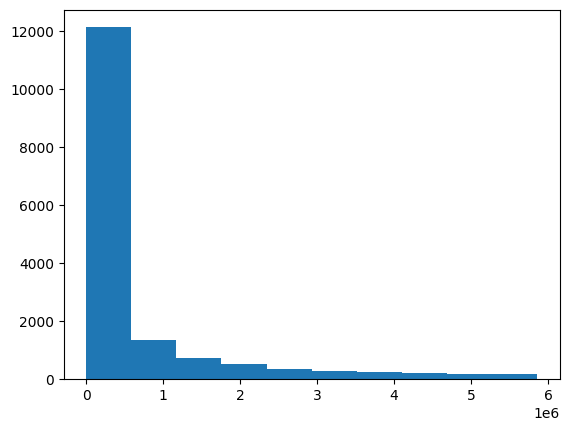

In [31]:
plt.hist(df["Total Production"])

(array([ 696., 2194., 3949., 3027., 2049., 1570.,  843.,  737.,  628.,
         427.]),
 array([0.14634146, 0.31059621, 0.47485095, 0.63910569, 0.80336043,
        0.96761518, 1.13186992, 1.29612466, 1.4603794 , 1.62463415,
        1.78888889]),
 <BarContainer object of 10 artists>)

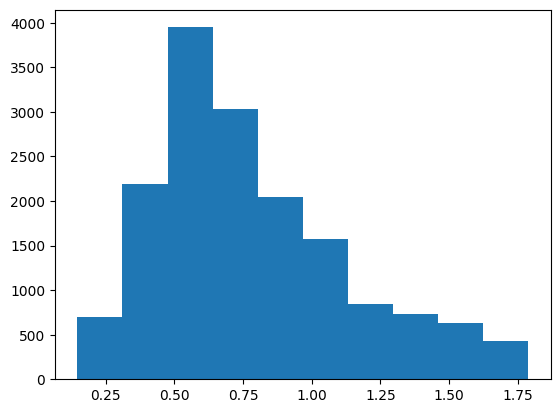

In [32]:
plt.hist(df["Productivity"])

In [33]:
df.to_csv("CleanedIQR.csv", index = False)

In [34]:
Q1 = df["Area(hectare)"].quantile(0.40)
Q3 = df["Area(hectare)"].quantile(0.60)
IQR = Q3 - Q1

df = df[(df["Area(hectare)"] >= Q1 - 1.5*IQR) & (df["Area(hectare)"] <= Q3 + 1.5*IQR)]

(array([4123., 1909., 1374., 1136.,  875.,  650.,  585.,  431.,  436.,
         443.]),
 array([  1.5 ,  87.45, 173.4 , 259.35, 345.3 , 431.25, 517.2 , 603.15,
        689.1 , 775.05, 861.  ]),
 <BarContainer object of 10 artists>)

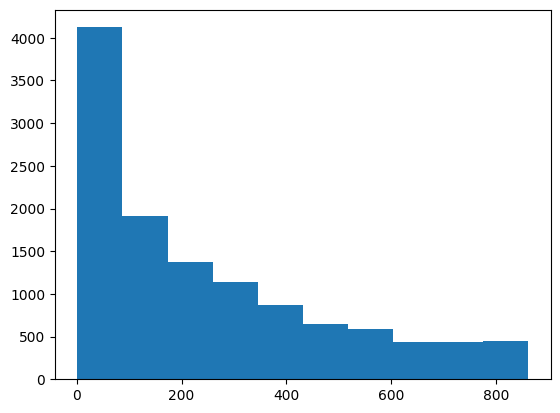

In [35]:
plt.hist(df["Area(hectare)"])

In [36]:
df.to_csv("CleanedIQR.csv", index = False)